In [25]:
conda install -c conda-forge scikit-learn

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3/envs/sklearn-env

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2021.5.30          |   py39h6e9494a_0         141 KB  conda-forge
    scikit-learn-0.24.2        |   py39hb2f4e1b_0         5.0 MB
    ------------------------------------------------------------
                                           Total:         5.2 MB

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2021.4.13-~ --> conda-forge::ca-certificates-2021.5.30-h033912b_0
  certifi            pkgs/main::certifi-2020.12.5-py39hecd~ --> conda-forge::certifi-2021.5.30-py39h6e9494a_0
  scikit-learn                        0.24.1-py39hb2f4e1b_0 --> 0.24.2-py39hb2f4e1b_0

The following packages will be SUPERSEDED by a higher-priority channel:

  opens

In [24]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [ ]:
conda install seaborn  

In [75]:
#Import necessary modules/packages (for entire coding)
import visualisation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import visualisation 
import plotly
import plotly.express as px
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
%matplotlib inline
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

In [4]:
#PCA and scree plots
#Loading and manipulating data to get it ready for PCA. 
#FC0/100/500 correspond to Tet 0/100/500ng/mL and zero, intermediate or high Myc expression. 
data = pd.read_csv (r'/Users/katemeeson/Desktop/06052021.csv', index_col=[0])
data = data.transpose()
labels = data.index # The labels give the sample-type for each row 
N, D = data.shape
data_unlabelled = data.copy() # this dataframe doesn't have labels in an extra column and is used in the PCA function
data['label'] = labels # this one has row labels as an extra column, which is useful for plotting
print('Samples: %s, Proteins: %s'%(N, D))
data

Samples: 9, Proteins: 2628


Accession,1B18_HUMAN,2AAA_HUMAN,2AAB_HUMAN,4EBP2_HUMAN;4EBP1_HUMAN;4EBP3_HUMAN,6PGD_HUMAN,6PGL_HUMAN,1433B_HUMAN,1433E_HUMAN,1433F_HUMAN,1433G_HUMAN,...,SMC2_HUMAN,PPIH_HUMAN,SF3B1_HUMAN,KS6B2_HUMAN,BRK1_HUMAN,PDZD2_HUMAN,SQSTM_HUMAN,VP26A_HUMAN,CC149_HUMAN,label
1_FC0_UNIMAN,135.786390,2717.152441,0.957894,713.186543,2553.155806,1553.432810,9404.851776,12134.891290,2083.855075,3221.205278,...,0.000000,15069.648050,4826.286732,0.000000,98.556887,1936.422674,2609.835234,735.099695,11677.882160,1_FC0_UNIMAN
2_FC0_UNIMAN,10.772416,3136.231976,2.629231,868.618474,2474.713822,1392.897386,10361.927580,10947.187770,1987.484437,3506.647732,...,0.000000,11550.864400,3855.626138,0.000000,0.000000,1879.789849,2786.084578,659.152613,726.751695,2_FC0_UNIMAN
3_FC0_UNIMAN,36.970907,2999.512457,1.850372,824.142912,2695.017392,1663.945952,9438.361047,11794.136990,2162.094395,3659.968211,...,0.000000,12840.776210,4007.991453,0.000000,0.000000,2057.976458,3283.612188,1100.849505,1008.956092,3_FC0_UNIMAN
1_FC100_UNIMAN,6.934908,3005.875169,0.195782,597.389097,2826.013498,1036.265158,7802.223217,8535.870247,2219.713738,3423.353485,...,0.000000,10518.028920,3798.314783,0.000000,40.164241,1013.182087,1868.223448,656.675534,1874.429476,1_FC100_UNIMAN
2_FC100_UNIMAN,45.906352,2795.020062,0.128790,565.994562,2642.527782,966.392636,8231.534193,9481.924830,1972.722544,3021.289539,...,0.000000,12331.798240,3343.531266,19.658531,90.792069,1753.996543,1108.381242,263.825213,5130.321783,2_FC100_UNIMAN
3_FC100_UNIMAN,16.630828,2821.660669,0.368443,603.498396,2649.418069,911.539294,7207.384058,9357.748538,1666.463579,3039.437635,...,5.020573,11514.501490,3475.156301,8.968705,80.584932,1794.266837,1483.254327,366.702038,4683.595291,3_FC100_UNIMAN
1_FC500_UNIMAN,34.062256,2347.035699,5.536934,681.696694,2324.440121,904.307932,5982.145641,9142.506278,1438.015395,2814.279645,...,50.786320,5986.918454,2227.797289,26.742719,6.401598,1300.057608,1194.204777,434.087824,4424.153049,1_FC500_UNIMAN
2_FC500_UNIMAN,21.822042,2334.977402,2.783264,658.935351,2307.042407,823.108470,6645.799110,8890.837549,1251.276573,2882.666074,...,31.827833,4912.573754,1400.202232,12.389011,10.217394,1319.553976,1221.458516,534.910767,3339.198646,2_FC500_UNIMAN
3_FC500_UNIMAN,9.196085,2740.521080,4.803573,712.519704,2446.558760,826.493416,6233.009015,8620.934413,1537.268474,3152.588740,...,0.000000,4950.512730,2444.526916,7.338352,4.239393,1194.265009,1213.826232,430.708927,542.741078,3_FC500_UNIMAN


In [5]:
#Calculating PCA scores using the 'visualisation.py' algorithm
W, scores, fracs = visualisation.do_pca(data_unlabelled, n_components=9)
scores = scores/abs(scores).max().max()
scores['label'] = labels

In [10]:
#2D PCA
XPC = 'PC1' # Principal component shown on x-axis
YPC = 'PC2' # Principal component shown on y-axis
fig = px.scatter(scores, x=XPC, y=YPC, color='label', hover_data=[XPC,YPC], title='2D Clustering of FC0, 100 and 500', color_discrete_map={"1_FC0_UNIMAN":"purple", "2_FC0_UNIMAN":"purple", "3_FC0_UNIMAN":"purple", "1_FC100_UNIMAN":"red", "2_FC100_UNIMAN":"red", "3_FC100_UNIMAN":"red", "1_FC500_UNIMAN":"turquoise", "2_FC500_UNIMAN":"turquoise", "3_FC500_UNIMAN":"turquoise"})
fig.update_traces(mode='markers', marker_line_width=1, marker_size=8)
fig.show()

x = np.arange(1,len(fracs)+1)
y = np.array(fracs)
fig = go.Figure(data=go.Scatter(x=x, y=y))  
fig.update_layout(xaxis_title='Principal component', yaxis_title='Variance explained (fraction)',
                  xaxis = dict(dtick = 1.0), title='Scree plot for the clustering of FC0, 100 and 500')
fig.show()

x = np.arange(1,len(fracs)+1)
y = np.cumsum(fracs)
fig = go.Figure(data=go.Scatter(x=x, y=y))
fig.update_layout(xaxis_title='Principal component', yaxis_title='Variance explained (cummulative)',
                 xaxis = dict(dtick = 1.0), title='Clustering of FC0, 100 and 500')
fig.show()

fig = px.scatter_3d(scores, x='PC1', y='PC2', z='PC3', color='label', title='3D Clustering of FC0, 100 and 500', color_discrete_map={"1_FC0_UNIMAN":"purple", "2_FC0_UNIMAN":"purple", "3_FC0_UNIMAN":"purple", "1_FC100_UNIMAN":"red", "2_FC100_UNIMAN":"red", "3_FC100_UNIMAN":"red", "1_FC500_UNIMAN":"turquoise", "2_FC500_UNIMAN":"turquoise", "3_FC500_UNIMAN":"turquoise"})
fig.show()

In [12]:
#Clustering (k-means, agglomerative hierarchical, performance analysis)
#reloading data as new variable for clustering
df_segmentation = pd.read_csv (r'/Users/katemeeson/Desktop/06052021.csv', index_col=[0])
df_segmentation = df_segmentation.transpose()
df_segmentation

Accession,1B18_HUMAN,2AAA_HUMAN,2AAB_HUMAN,4EBP2_HUMAN;4EBP1_HUMAN;4EBP3_HUMAN,6PGD_HUMAN,6PGL_HUMAN,1433B_HUMAN,1433E_HUMAN,1433F_HUMAN,1433G_HUMAN,...,GNA12_HUMAN,SMC2_HUMAN,PPIH_HUMAN,SF3B1_HUMAN,KS6B2_HUMAN,BRK1_HUMAN,PDZD2_HUMAN,SQSTM_HUMAN,VP26A_HUMAN,CC149_HUMAN
1_FC0_UNIMAN,135.786390,2717.152441,0.957894,713.186543,2553.155806,1553.432810,9404.851776,12134.891290,2083.855075,3221.205278,...,1383.424836,0.000000,15069.648050,4826.286732,0.000000,98.556887,1936.422674,2609.835234,735.099695,11677.882160
2_FC0_UNIMAN,10.772416,3136.231976,2.629231,868.618474,2474.713822,1392.897386,10361.927580,10947.187770,1987.484437,3506.647732,...,1249.159160,0.000000,11550.864400,3855.626138,0.000000,0.000000,1879.789849,2786.084578,659.152613,726.751695
3_FC0_UNIMAN,36.970907,2999.512457,1.850372,824.142912,2695.017392,1663.945952,9438.361047,11794.136990,2162.094395,3659.968211,...,2555.187122,0.000000,12840.776210,4007.991453,0.000000,0.000000,2057.976458,3283.612188,1100.849505,1008.956092
1_FC100_UNIMAN,6.934908,3005.875169,0.195782,597.389097,2826.013498,1036.265158,7802.223217,8535.870247,2219.713738,3423.353485,...,1459.031062,0.000000,10518.028920,3798.314783,0.000000,40.164241,1013.182087,1868.223448,656.675534,1874.429476
2_FC100_UNIMAN,45.906352,2795.020062,0.128790,565.994562,2642.527782,966.392636,8231.534193,9481.924830,1972.722544,3021.289539,...,1596.916623,0.000000,12331.798240,3343.531266,19.658531,90.792069,1753.996543,1108.381242,263.825213,5130.321783
3_FC100_UNIMAN,16.630828,2821.660669,0.368443,603.498396,2649.418069,911.539294,7207.384058,9357.748538,1666.463579,3039.437635,...,944.553160,5.020573,11514.501490,3475.156301,8.968705,80.584932,1794.266837,1483.254327,366.702038,4683.595291
1_FC500_UNIMAN,34.062256,2347.035699,5.536934,681.696694,2324.440121,904.307932,5982.145641,9142.506278,1438.015395,2814.279645,...,603.479544,50.786320,5986.918454,2227.797289,26.742719,6.401598,1300.057608,1194.204777,434.087824,4424.153049
2_FC500_UNIMAN,21.822042,2334.977402,2.783264,658.935351,2307.042407,823.108470,6645.799110,8890.837549,1251.276573,2882.666074,...,804.005369,31.827833,4912.573754,1400.202232,12.389011,10.217394,1319.553976,1221.458516,534.910767,3339.198646
3_FC500_UNIMAN,9.196085,2740.521080,4.803573,712.519704,2446.558760,826.493416,6233.009015,8620.934413,1537.268474,3152.588740,...,840.597858,0.000000,4950.512730,2444.526916,7.338352,4.239393,1194.265009,1213.826232,430.708927,542.741078


In [14]:
#Perform PCA again ready for working out optimal cluster frequency. 
#Scaling data for PCA. 
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

In [16]:
#Performing PCA. Using three components, as scree plots above show these contain the majority of the variance. 
pca = PCA(n_components = 3)
pca.fit(segmentation_std)
pca.transform(segmentation_std)

array([[-33.73594729, -20.77537412,  30.16629935],
       [-42.19036438, -15.57033383, -13.4233988 ],
       [-44.42210827, -18.54854807, -15.86658053],
       [ -9.29962357,  42.39377317, -21.81508558],
       [  2.67071641,  26.29694475,  20.56728475],
       [  0.1113806 ,  29.07229262,  15.74560628],
       [ 45.35972744, -17.38798124,   5.80880094],
       [ 44.26185373, -17.56396405,   1.77092395],
       [ 37.24436533,  -7.91680925, -22.95385036]])

In [17]:
#Assigning variable to PCA scores ready for within-cluster-sum-of-squares analysis. 
scores_pca = pca.transform(segmentation_std)

Optimal number of clusters 3


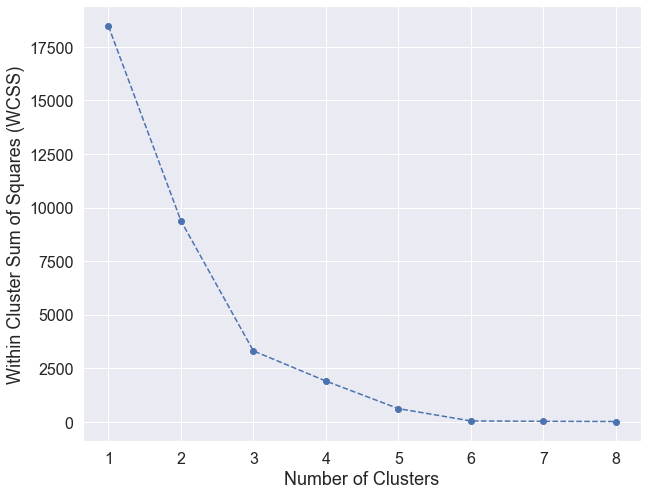

In [30]:
#Performing WCSS to calculate optimal cluster frequency, prior to clustering. 
wcss = []
max_clusters = 9
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Optimal number of clusters", n_clusters)

fig = plt.figure(figsize=(10,8))
plt.plot(range(1, 9), wcss, marker='o', linestyle='--')
# plt.vlines(n_clusters, ymin=0, ymax=max(wcss), linestyles='dashed')
plt.xlabel('Number of Clusters', fontsize=18)
plt.ylabel('Within Cluster Sum of Squares (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [41]:
#Assigning K-means labels based on PCA scores. 
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)
df_segmentation['Cluster'] = kmeans_pca.labels_
df_segmentation['Cluster']

1_FC0_UNIMAN      1
2_FC0_UNIMAN      1
3_FC0_UNIMAN      1
1_FC100_UNIMAN    2
2_FC100_UNIMAN    2
3_FC100_UNIMAN    2
1_FC500_UNIMAN    0
2_FC500_UNIMAN    0
3_FC500_UNIMAN    0
Name: Cluster, dtype: int32

In [45]:
#Creating dataframe to contain protein abundances, PCA scores, and K-means cluster.
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3:]=['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head()

,1B18_HUMAN,2AAA_HUMAN,2AAB_HUMAN,4EBP2_HUMAN;4EBP1_HUMAN;4EBP3_HUMAN,6PGD_HUMAN,6PGL_HUMAN,1433B_HUMAN,1433E_HUMAN,1433F_HUMAN,1433G_HUMAN,...,BRK1_HUMAN,PDZD2_HUMAN,SQSTM_HUMAN,VP26A_HUMAN,CC149_HUMAN,Cluster,Component 1,Component 2,Component 3,Segment K-means PCA
0,135.786390,2717.152441,0.957894,713.186543,2553.155806,1553.432810,9404.851776,12134.891290,2083.855075,3221.205278,...,98.556887,1936.422674,2609.835234,735.099695,11677.882160,1,-33.735947,-20.775374,30.166299,1
1,10.772416,3136.231976,2.629231,868.618474,2474.713822,1392.897386,10361.927580,10947.187770,1987.484437,3506.647732,...,0.000000,1879.789849,2786.084578,659.152613,726.751695,1,-42.190364,-15.570334,-13.423399,1
2,36.970907,2999.512457,1.850372,824.142912,2695.017392,1663.945952,9438.361047,11794.136990,2162.094395,3659.968211,...,0.000000,2057.976458,3283.612188,1100.849505,1008.956092,1,-44.422108,-18.548548,-15.866581,1
3,6.934908,3005.875169,0.195782,597.389097,2826.013498,1036.265158,7802.223217,8535.870247,2219.713738,3423.353485,...,40.164241,1013.182087,1868.223448,656.675534,1874.429476,2,-9.299624,42.393773,-21.815086,2
4,45.906352,2795.020062,0.128790,565.994562,2642.527782,966.392636,8231.534193,9481.924830,1972.722544,3021.289539,...,90.792069,1753.996543,1108.381242,263.825213,5130.321783,2,2.670716,26.296945,20.567285,2


In [46]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({2:'1-3_FC0_UNIMAN', 0:'1-3_FC500_UNIMAN', 1:'1-3_FC100_UNIMAN'})

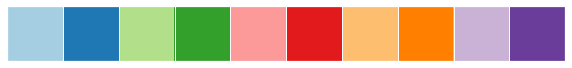

In [47]:
palette = sns.palplot(sns.color_palette("Paired", 10))

/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



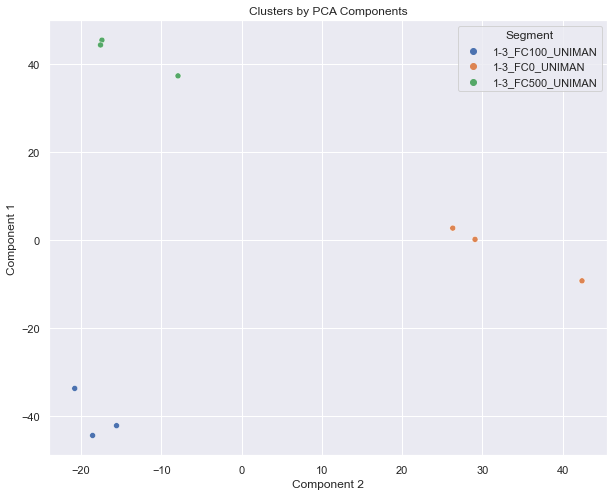

In [48]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette = palette)
plt.title('Clusters by PCA Components')
plt.show()

In [62]:
#Agglomerative hierarchical clustering (dendrogram and cluster plot).
#Loading dataset again to assign new variable for agglomerative clustering.
data = pd.read_csv (r'/Users/katemeeson/Desktop/06052021.csv', index_col=[0])
data = data.transpose()
data

Accession,1B18_HUMAN,2AAA_HUMAN,2AAB_HUMAN,4EBP2_HUMAN;4EBP1_HUMAN;4EBP3_HUMAN,6PGD_HUMAN,6PGL_HUMAN,1433B_HUMAN,1433E_HUMAN,1433F_HUMAN,1433G_HUMAN,...,GNA12_HUMAN,SMC2_HUMAN,PPIH_HUMAN,SF3B1_HUMAN,KS6B2_HUMAN,BRK1_HUMAN,PDZD2_HUMAN,SQSTM_HUMAN,VP26A_HUMAN,CC149_HUMAN
1_FC0_UNIMAN,135.786390,2717.152441,0.957894,713.186543,2553.155806,1553.432810,9404.851776,12134.891290,2083.855075,3221.205278,...,1383.424836,0.000000,15069.648050,4826.286732,0.000000,98.556887,1936.422674,2609.835234,735.099695,11677.882160
2_FC0_UNIMAN,10.772416,3136.231976,2.629231,868.618474,2474.713822,1392.897386,10361.927580,10947.187770,1987.484437,3506.647732,...,1249.159160,0.000000,11550.864400,3855.626138,0.000000,0.000000,1879.789849,2786.084578,659.152613,726.751695
3_FC0_UNIMAN,36.970907,2999.512457,1.850372,824.142912,2695.017392,1663.945952,9438.361047,11794.136990,2162.094395,3659.968211,...,2555.187122,0.000000,12840.776210,4007.991453,0.000000,0.000000,2057.976458,3283.612188,1100.849505,1008.956092
1_FC100_UNIMAN,6.934908,3005.875169,0.195782,597.389097,2826.013498,1036.265158,7802.223217,8535.870247,2219.713738,3423.353485,...,1459.031062,0.000000,10518.028920,3798.314783,0.000000,40.164241,1013.182087,1868.223448,656.675534,1874.429476
2_FC100_UNIMAN,45.906352,2795.020062,0.128790,565.994562,2642.527782,966.392636,8231.534193,9481.924830,1972.722544,3021.289539,...,1596.916623,0.000000,12331.798240,3343.531266,19.658531,90.792069,1753.996543,1108.381242,263.825213,5130.321783
3_FC100_UNIMAN,16.630828,2821.660669,0.368443,603.498396,2649.418069,911.539294,7207.384058,9357.748538,1666.463579,3039.437635,...,944.553160,5.020573,11514.501490,3475.156301,8.968705,80.584932,1794.266837,1483.254327,366.702038,4683.595291
1_FC500_UNIMAN,34.062256,2347.035699,5.536934,681.696694,2324.440121,904.307932,5982.145641,9142.506278,1438.015395,2814.279645,...,603.479544,50.786320,5986.918454,2227.797289,26.742719,6.401598,1300.057608,1194.204777,434.087824,4424.153049
2_FC500_UNIMAN,21.822042,2334.977402,2.783264,658.935351,2307.042407,823.108470,6645.799110,8890.837549,1251.276573,2882.666074,...,804.005369,31.827833,4912.573754,1400.202232,12.389011,10.217394,1319.553976,1221.458516,534.910767,3339.198646
3_FC500_UNIMAN,9.196085,2740.521080,4.803573,712.519704,2446.558760,826.493416,6233.009015,8620.934413,1537.268474,3152.588740,...,840.597858,0.000000,4950.512730,2444.526916,7.338352,4.239393,1194.265009,1213.826232,430.708927,542.741078


In [63]:
#Scaling data for PCA. 
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data)
pca = PCA()
pca.fit(segmentation_std)
pca = PCA(n_components = 2)
pca.fit(segmentation_std)
pca.transform(segmentation_std)
scores_pca = pca.transform(segmentation_std)
data = scores_pca

In [64]:
#Showing PCA scores.
scores_pca

array([[-33.73594729, -20.77537412],
       [-42.19036438, -15.57033383],
       [-44.42210827, -18.54854807],
       [ -9.29962357,  42.39377317],
       [  2.67071641,  26.29694475],
       [  0.1113806 ,  29.07229262],
       [ 45.35972744, -17.38798124],
       [ 44.26185373, -17.56396405],
       [ 37.24436533,  -7.91680925]])

<ipython-input-65-520b425f61fb>:6: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later

<ipython-input-65-520b425f61fb>:6: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later



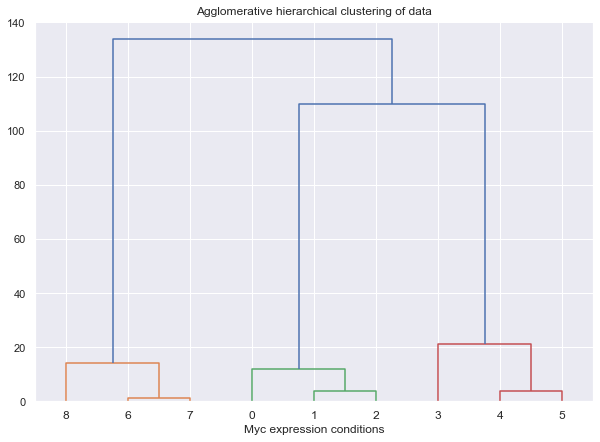

In [65]:
#Generating dendrogram. 
plt.figure(figsize=(10, 7))
plt.title("Agglomerative hierarchical clustering of data")
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.xlabel('Myc expression conditions')
plt.savefig('x5', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

In [78]:
#Labelling Myc conditions/repeats with their cluster number. 
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([2, 2, 2, 0, 0, 0, 1, 1, 1])

<ipython-input-68-11399d1036f5>:5: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later

<ipython-input-68-11399d1036f5>:5: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later



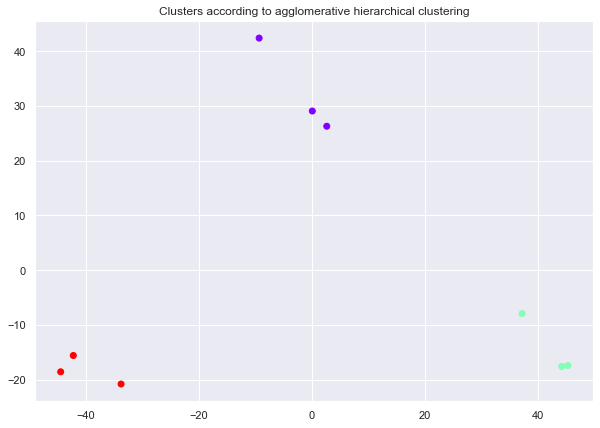

In [68]:
#Plotting agglomerative hierarchical cluster plot.
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow', )
plt.title('Clusters according to agglomerative hierarchical clustering')
plt.savefig('x4', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

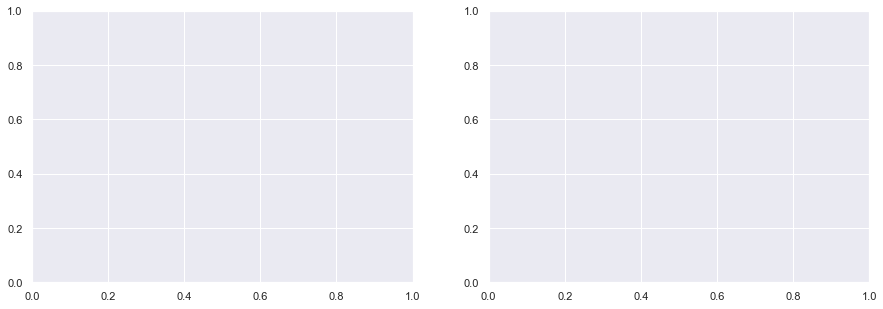

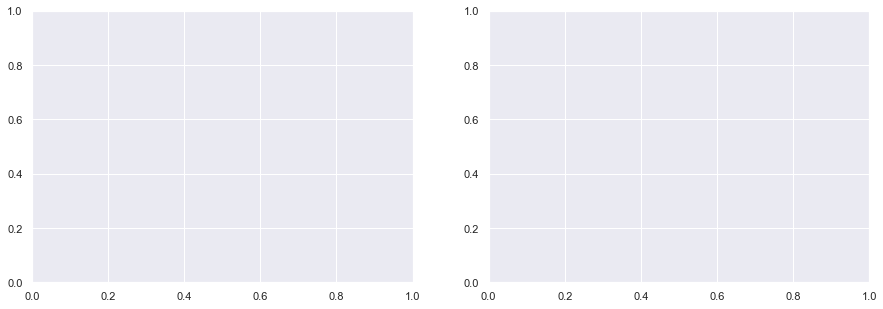

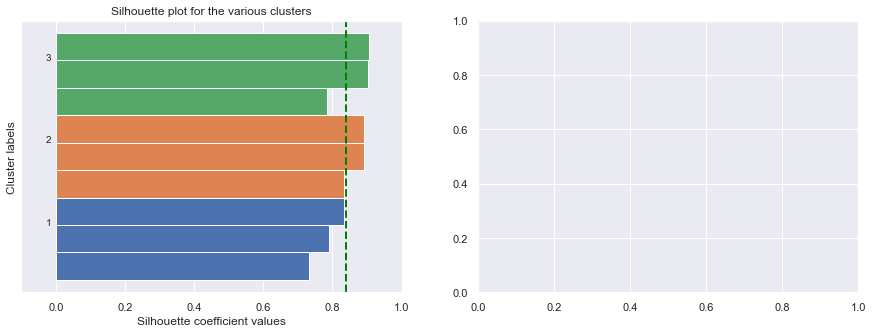

In [74]:
#Sillhouette plot to assess quality of clustering/optimal frequency.
#Score close to 1 indicates high similarity of sample to its own cluster and low similarity to other clusters. 
for i,k in enumerate([1,2,3]):
    
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    
km = KMeans(n_clusters=k)
y_predict = km.fit_predict(data)
centroids  = km.cluster_centers_

silhouette_vals = silhouette_samples(data,y_predict)

y_ticks = []
y_lower = y_upper = 0

for i,cluster in enumerate(np.unique(y_predict)):
   cluster_silhouette_vals = silhouette_vals[y_predict ==cluster]
   cluster_silhouette_vals.sort()
   y_upper += len(cluster_silhouette_vals)
   
   ax[0].barh(range(y_lower,y_upper),
   cluster_silhouette_vals,height =1);
   ax[0].text(-0.03,(y_lower+y_upper)/2,str(i+1))
   y_lower += len(cluster_silhouette_vals)

avg_score = np.mean(silhouette_vals)
ax[0].axvline(avg_score,linestyle ='--',linewidth =2,color = 'green')
ax[0].set_yticks([])
ax[0].set_xlim([-0.1, 1])
ax[0].set_xlabel('Silhouette coefficient values')
ax[0].set_ylabel('Cluster labels')
ax[0].set_title('Silhouette plot for the various clusters');

In [82]:
#Adjusted rand index to find agreement between K-means and agglomerative hierarchical clustering.
labels2 = cluster.fit_predict(data) #Cluster labels assigned during agglomerative hierarchical analysis.

k_means_clusters = df_segmentation['Cluster'] #Cluster labels assigned during K-means analysis.  

adjusted_rand_score(k_means_clusters, agg_hier_clusters)

1.0